In [34]:
%matplotlib inline
import bt

In [35]:
# download data
data = bt.get('fb,amzn,aapl,nflx,goog', start='2010-01-01')

In [36]:
data.head()

,fb,amzn,aapl,nflx,goog
Date,,,,,
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881


In [37]:
data.tail()

,fb,amzn,aapl,nflx,goog
Date,,,,,
2020-09-24,249.529999,3019.790039,108.220001,473.079987,1428.290039
2020-09-25,254.820007,3095.129883,112.279999,482.880005,1444.959961
2020-09-28,256.820007,3174.050049,114.959999,490.649994,1464.520020
2020-09-29,261.790009,3144.879883,114.089996,493.480011,1469.329956
2020-09-30,261.899994,3148.729980,115.809998,500.029999,1469.599976


In [38]:
# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average
sma = data.rolling(50).mean()

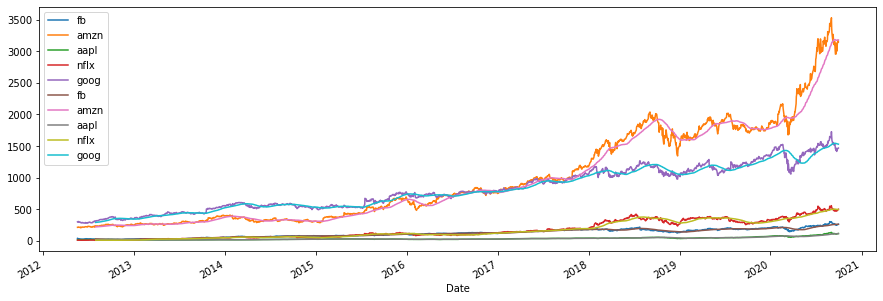

In [39]:
# let's see what the data looks like - this is by no means a pretty chart, but it does the job
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [40]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

In [41]:
def long_only_ew(tickers, start='2010-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

In [59]:
def long_only_ew_com(tickers, start='2010-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data, commissions=lambda q, p: p*max(1, abs(q) * 0.01))

In [60]:
benchmark = long_only_ew(list(data.columns), name='FAANG-EW')
benchmark_com = long_only_ew_com(list(data.columns), name='FAANG-EW-Com')
# run all the backtests!
res2 = bt.run( benchmark,benchmark_com)

FANNG-EW
0% [############################# ] 100% | ETA: 00:00:00FANNG-EW-Com
0% [############################# ] 100% | ETA: 00:00:00

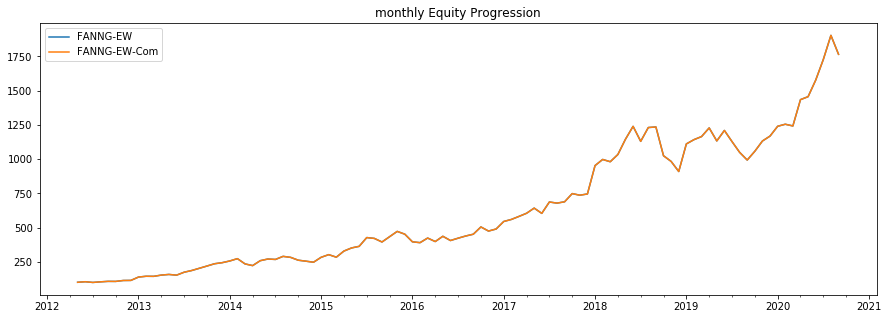

In [61]:
res2.plot(freq='m')

In [62]:
res2.display()

Stat                 FANNG-EW    FANNG-EW-Com
-------------------  ----------  --------------
Start                2012-05-17  2012-05-17
End                  2020-09-30  2020-09-30
Risk-free rate       0.00%       0.00%

Total Return         1571.71%    1555.02%
Daily Sharpe         1.28        1.28
Daily Sortino        2.18        2.17
CAGR                 39.99%      39.82%
Max Drawdown         -38.18%     -38.18%
Calmar Ratio         1.05        1.04

MTD                  -7.26%      -7.26%
3m                   11.97%      11.97%
6m                   43.26%      43.26%
YTD                  51.14%      51.14%
1Y                   77.80%      77.80%
3Y (ann.)            37.69%      37.69%
5Y (ann.)            34.95%      34.94%
10Y (ann.)           39.99%      39.82%
Since Incep. (ann.)  39.99%      39.82%

Daily Sharpe         1.28        1.28
Daily Sortino        2.18        2.17
Daily Mean (ann.)    38.16%      38.04%
Daily Vol (ann.)     29.83%      29.83%
Daily Skew           0.

In [72]:
from math import *
exp(2*0.8)/(exp(2*0.8)+exp(2*0.5))

0.6456563062257955